In [1]:
import pandas as pd

df= pd.read_csv(r'C:\Users\fnafisa\WORKSPACE\kaggle\data\Oil\Brent Oil Futures Historical Data; daily.csv')

## Load dataset

In [2]:
df

,Date,Price,Open,High,Low,Vol.,Change %
0,1/4/2000,24.39,23.90,24.70,23.89,32.51K,-2.75%
1,1/5/2000,23.73,24.25,24.37,23.70,30.31K,-2.71%
2,1/6/2000,23.62,23.55,24.22,23.35,44.66K,-0.46%
3,1/7/2000,23.09,23.57,23.98,23.05,34.83K,-2.24%
4,1/10/2000,23.73,23.04,23.78,23.04,26.39K,2.77%
...,...,...,...,...,...,...,...
5860,10/27/2022,95.04,94.15,95.30,93.18,247.96K,1.33%
5861,10/28/2022,93.77,94.61,94.90,93.02,281.47K,-1.34%
5862,10/31/2022,92.81,94.43,94.48,91.46,304.53K,-1.02%
5863,11/1/2022,92.79,90.87,93.69,90.56,151.21K,-0.02%


In [5]:
df= df[['Date','Price']]

## Date column is in Object format, so need convert it to be in Date format...

In [6]:
df.Date

0         1/4/2000
1         1/5/2000
2         1/6/2000
3         1/7/2000
4        1/10/2000
           ...    
5860    10/27/2022
5861    10/28/2022
5862    10/31/2022
5863     11/1/2022
5864     11/2/2022
Name: Date, Length: 5865, dtype: object

In [7]:
import datetime

def str_to_datetime(s):
    split= s.split('/')
    month, day, year= int(split[0]), int(split[1]), int(split[2])
    return datetime.datetime(year= year, month= month, day= day)

temp_obj_date= str_to_datetime('1/4/2000')
temp_obj_date

datetime.datetime(2000, 1, 4, 0, 0)

In [8]:
df['Date']= df['Date'].apply(str_to_datetime) 
df['Date']

C:\Users\fnafisa\AppData\Local\Temp\ipykernel_584\2541015291.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date']= df['Date'].apply(str_to_datetime)


0      2000-01-04
1      2000-01-05
2      2000-01-06
3      2000-01-07
4      2000-01-10
          ...    
5860   2022-10-27
5861   2022-10-28
5862   2022-10-31
5863   2022-11-01
5864   2022-11-02
Name: Date, Length: 5865, dtype: datetime64[ns]

## Use Date column as index and remove as a column...

In [9]:
df.index= df.pop('Date')
df

,Price
Date,
2000-01-04,24.39
2000-01-05,23.73
2000-01-06,23.62
2000-01-07,23.09
2000-01-10,23.73
...,...
2022-10-27,95.04
2022-10-28,93.77
2022-10-31,92.81


## Plot the data

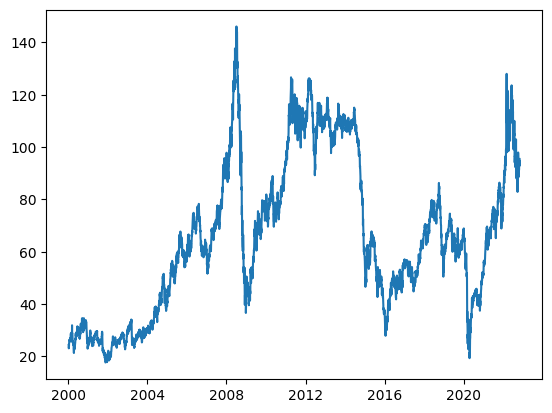

In [10]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Price'])

In [ ]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
    first_date= str_to_datetime(first_date_str) #where to begin
    last_date = str_to_datetime(last_date_str ) #where to end

    target_date= first_date # ???

    dates= [] # list of Target Date?
    X, Y= [], [] # the matrix Target and the Target(output)

    last_time= False # ???

    #  loop throught the entire dataframe
    while True: 
        df_subset= dataframe.loc[:target_date].tail(n+1)

        if len(df_subset) != n+1:
            print(f'Error: Window of size {n} is too large for date {target_date}')
            return
        
        values= df_subset['Price'].to_numpy()
        x, y= values[:-1], values[-1]

        dates.append(target_date)
        X.append(x)
        Y.append(y)

        # the next few lines are to get the next target date
        next_week= dataframe.loc[target_date: target_date.datetime.timedelta(days=7)]
        next_datetime_str= str(next_week.head(2).tail(1).index.values[0])
        print(next_week.head(2).tail(1).index)
        next_date_str= next_datetime_str.split('T')[0]
        year_month_day= next_date_str.split('-')
        year, month, day= year_month_day
        next_date= datetime.datetime(day=int(day), month= int(month), year= int(year))

        if last_time:
            break
        
        target_date= next_date

        # this condition is to break the loop
        if target_date == next_date:
            last_time= True

    # date column    
    ret_df= pd.DataFrame({})
    ret_df['Target Date'] = dates
    # matrix columns
    X= np.array(x)
    for i in range(0, n):
        X[:, i]
        ret_df[f'Target-{n-i}']= X[:, i]
    # target column
    ret_df['Target']= Y

    return ret_df


